<a href="https://colab.research.google.com/github/Harsh-GISMA/M505A-/blob/main/exercises/machine-learning/unsupervised-learning/clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering
You should build an end-to-end machine learning pipeline using a clustering model. In particular, you should do the following:
- Load the `customers` dataset using [Pandas](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html). You can find this dataset in the datasets folder.
- Conduct data exploration, data preprocessing, and feature engineering if necessary.
- Choose a few clustering algorithms, such as [k-means](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html), [hdbscan](https://hdbscan.readthedocs.io/en/latest/), and [agglomerative clustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html).
- Train and evaluate clustering models (i.e., the clustering algorithm and its hyperparameters) to find out the best-performing model using clustering evaluation metrics, such as [elbow method](https://www.scikit-yb.org/en/latest/api/cluster/elbow.html) and the [silhouette score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html).
- Check the documentation to identify the most important hyperparameters, attributes, and methods of the model. Use them in practice.

## Importing all libraries

In [67]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from sklearn.datasets import make_blobs
import hdbscan

## Importing the Data set

In [68]:
df = pd.read_csv('https://raw.githubusercontent.com/m-mahdavi/teaching/refs/heads/main/datasets/customers.csv')
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


## Lets perform some data exploration

In [69]:
df.shape

(2000, 8)

In [70]:
df.dtypes

,0
ID,int64
Sex,int64
Marital status,int64
Age,int64
Education,int64
Income,int64
Occupation,int64
Settlement size,int64


In [71]:
df.isnull().sum().sum()

0

## feature eng

In [72]:
scaler = StandardScaler()
scaler.fit_transform(df)


array([[-1.731185  , -0.91739884, -0.99302433, ...,  0.09752361,
         0.29682303,  1.552326  ],
       [-1.72945295,  1.09003844,  1.00702467, ...,  0.78265438,
         0.29682303,  1.552326  ],
       [-1.7277209 , -0.91739884, -0.99302433, ..., -0.83320224,
        -1.26952539, -0.90972951],
       ...,
       [ 1.7277209 , -0.91739884, -0.99302433, ..., -0.90695688,
        -1.26952539, -0.90972951],
       [ 1.72945295,  1.09003844,  1.00702467, ..., -0.60332923,
        -1.26952539, -0.90972951],
       [ 1.731185  , -0.91739884, -0.99302433, ..., -1.3789866 ,
        -1.26952539, -0.90972951]])

In [73]:
df = df.drop(columns="ID")

## Lets use Kmeans first

In [74]:
k = 7
kmeans = KMeans(n_clusters=k, random_state=40)
kmeans.fit(df)

KMeans(n_clusters=7, random_state=40)

In [75]:
labels = kmeans.labels_

In [76]:
silhouette_avg = silhouette_score(df, labels)
print("The average silhouette score is :", silhouette_avg)

The average silhouette score is : 0.5314775316556831


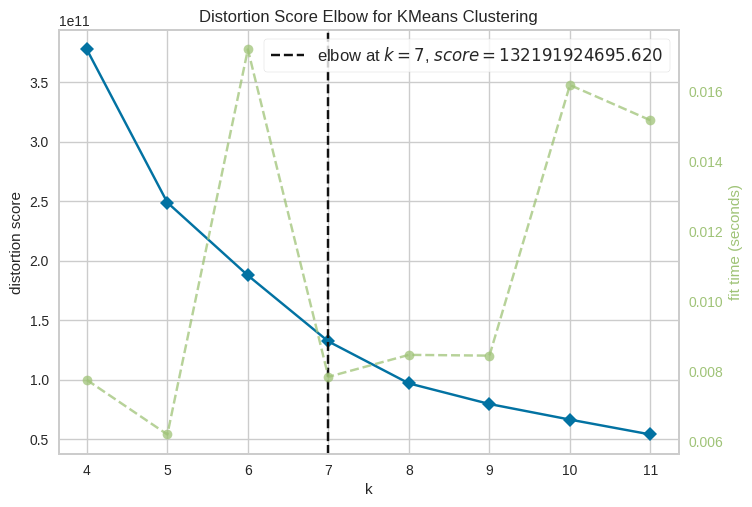

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [77]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12))
visualizer.fit(df)
visualizer.show()

## lets try using hdbscan

In [78]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=40, min_samples=10)
clusterer.fit(df)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


HDBSCAN(min_cluster_size=40, min_samples=10)

In [79]:
labels = clusterer.labels_

In [80]:
silhouette_avg = silhouette_score(df, labels)
print("The average silhouette score is :", silhouette_avg)

The average silhouette score is : 0.24588443128745582


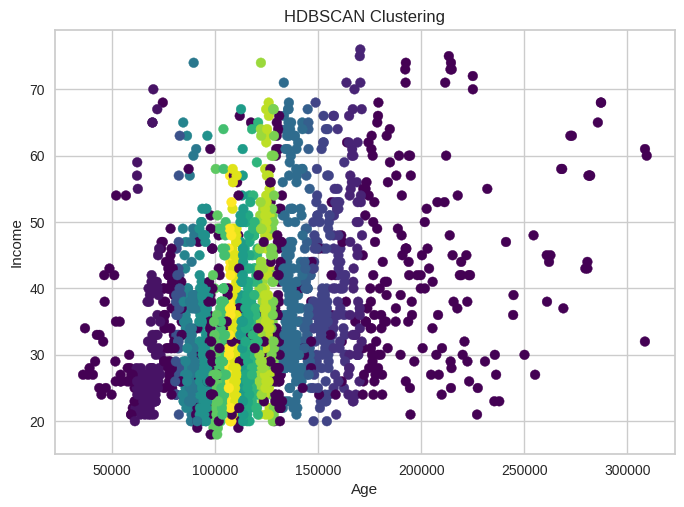

In [82]:
plt.scatter(df['Income'], df['Age'], c=labels, cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('HDBSCAN Clustering')
plt.show()